<a href="https://colab.research.google.com/github/Manojthokala30/Manojthokala30/blob/main/predictive_maintenance_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/predictive_maintenance_data (1).csv')

# Display basic information about the dataset
df.info(), df.head()

# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extract features from timestamp
df['hour'] = df['timestamp'].dt.hour
df['day'] = df['timestamp'].dt.day
df['month'] = df['timestamp'].dt.month

# Drop the original timestamp column
df.drop(columns=['timestamp'], inplace=True)

# Normalize sensor readings
sensor_columns = [f'sensor_{i}' for i in range(1, 6)]
scaler = StandardScaler()
df[sensor_columns] = scaler.fit_transform(df[sensor_columns])

# Split the data into training and testing sets
X = df.drop(columns=['failure'])
y = df['failure']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Save the model if needed
joblib.dump(model, 'predictive_maintenance_model.pkl')

# Example new data
new_data = pd.DataFrame({
    'timestamp': ['2024-02-01 00:00:00', '2024-02-01 01:00:00'],
    'equipment_id': [1, 2],
    'sensor_1': [95.0, 100.0],
    'sensor_2': [97.0, 105.0],
    'sensor_3': [101.0, 110.0],
    'sensor_4': [98.0, 108.0],
    'sensor_5': [99.0, 107.0],
    'maintenance_log': [0, 1]
})

# Convert timestamp to datetime
new_data['timestamp'] = pd.to_datetime(new_data['timestamp'])

# Extract features from timestamp
new_data['hour'] = new_data['timestamp'].dt.hour
new_data['day'] = new_data['timestamp'].dt.day
new_data['month'] = new_data['timestamp'].dt.month

# Drop the original timestamp column
new_data.drop(columns=['timestamp'], inplace=True)

# Normalize sensor readings
sensor_columns = [f'sensor_{i}' for i in range(1, 6)]
scaler = StandardScaler()
new_data[sensor_columns] = scaler.fit_transform(new_data[sensor_columns])

# Ensure the features match those used in training
X_new = new_data[['equipment_id', 'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5',
                  'maintenance_log', 'hour', 'day', 'month']]

# Predict whether the machines will fail
predictions = model.predict(X_new)
prediction_probabilities = model.predict_proba(X_new)[:, 1]

# Display the predictions
new_data['predicted_failure'] = predictions
new_data['failure_probability'] = prediction_probabilities

print(new_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   timestamp        1000 non-null   object 
 1   equipment_id     1000 non-null   int64  
 2   sensor_1         1000 non-null   float64
 3   sensor_2         1000 non-null   float64
 4   sensor_3         1000 non-null   float64
 5   sensor_4         1000 non-null   float64
 6   sensor_5         1000 non-null   float64
 7   maintenance_log  1000 non-null   int64  
 8   failure          1000 non-null   int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 70.4+ KB
Confusion Matrix:
[[197   0]
 [  3   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       197
           1       0.00      0.00      0.00         3

    accuracy                           0.98       200
   macro avg       0.49      0.50      0.50

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
for i in range(len(new_data)):
    machine_id = new_data.loc[i, 'equipment_id']
    predicted_failure = new_data.loc[i, 'predicted_failure']
    print(f"Machine ID: {machine_id}, Predicted Failure: {predicted_failure}")

Machine ID: 1, Predicted Failure: 0
Machine ID: 2, Predicted Failure: 0


In [ ]:
# Separate the data into failure and not failure cases
failed_data = new_data[new_data['predicted_failure'] == True]
not_failed_data = new_data[new_data['predicted_failure'] == False]

# Print the failed data
print("Failed Data:")
print(failed_data)

# Print the not failed data
print("\nNot Failed Data:")
print(not_failed_data)

Failed Data:
Empty DataFrame
Columns: [equipment_id, sensor_1, sensor_2, sensor_3, sensor_4, sensor_5, maintenance_log, hour, day, month, predicted_failure, failure_probability]
Index: []

Not Failed Data:
   equipment_id  sensor_1  sensor_2  sensor_3  sensor_4  sensor_5  \
0             1      -1.0      -1.0      -1.0      -1.0      -1.0   
1             2       1.0       1.0       1.0       1.0       1.0   

   maintenance_log  hour  day  month  predicted_failure  failure_probability  
0                0     0    1      2                  0                 0.01  
1                1     1    1      2                  0                 0.00  


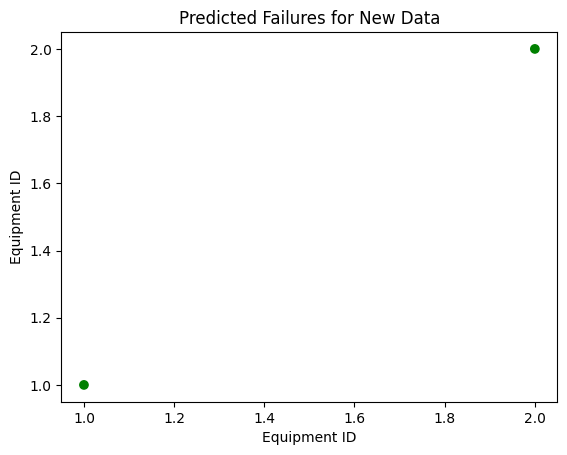

In [ ]:
import matplotlib.pyplot as plt

# Create a list of colors based on predicted failure status
colors = ['green' if failure == 0 else 'red' for failure in new_data['predicted_failure']]

# Create a scatter plot with the colors
plt.scatter(new_data['equipment_id'], new_data['equipment_id'], c=colors)

# Add labels and title
plt.xlabel("Equipment ID")
plt.ylabel("Equipment ID")
plt.title("Predicted Failures for New Data")

# Show the plot
plt.show()